In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.mobilenet import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
# For VGG16
x_train_vgg16 = preprocess_input(x_train)
x_test_vgg16 = preprocess_input(x_test)

base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model_vgg16.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=x)
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train VGG16
history_vgg16 = model_vgg16.fit(
    x_train_vgg16, y_train, 
    epochs=5, 
    validation_data=(x_test_vgg16, y_test), 
    batch_size=64
)

# Evaluate VGG16
val_loss_vgg16, val_acc_vgg16 = model_vgg16.evaluate(x_test_vgg16, y_test)
print(f"VGG16 - Test Accuracy: {val_acc_vgg16:.4f}, Test Loss: {val_loss_vgg16:.4f}")

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 227s 289ms/step - accuracy: 0.1604 - loss: 2.4870 - val_accuracy: 0.2338 - val_loss: 2.1020
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 216s 276ms/step - accuracy: 0.2420 - loss: 2.0886 - val_accuracy: 0.2647 - val_loss: 1.9861
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 206s 264ms/step - accuracy: 0.2675 - loss: 2.0018 - val_accuracy: 0.2522 - val_loss: 2.0640
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 212s 271ms/step - accuracy: 0.2797 - loss: 1.9632 - val_accuracy: 0.2362 - val_loss: 2.0113
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 222s 284ms/step - accuracy: 0.2861 - loss: 1.9449 - val_accuracy: 0.2749 - val_loss: 1.9277
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 123ms/step - accuracy: 0.2725 - loss: 1.9393
VGG16 - Test Accuracy: 0.2749, Test Loss: 1.9277


In [4]:
# For ResNet50
x_train_resnet50 = preprocess_input_resnet(x_train)
x_test_resnet50 = preprocess_input_resnet(x_test)

base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model_resnet50.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=x)
model_resnet50.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# train
history_resnet50 = model_resnet50.fit(
    x_train_resnet50, y_train, 
    epochs=5, 
    validation_data=(x_test_resnet50, y_test), 
    batch_size=64
)

val_loss_resnet50, val_acc_resnet50 = model_resnet50.evaluate(x_test_resnet50, y_test)
print(f"ResNet50 - Test Accuracy: {val_acc_resnet50:.4f}, Test Loss: {val_loss_resnet50:.4f}")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 51s 1us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 167ms/step - accuracy: 0.1128 - loss: 2.4421 - val_accuracy: 0.1349 - val_loss: 2.2566
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.1549 - loss: 2.2345 - val_accuracy: 0.1744 - val_loss: 2.2018
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 133ms/step - accuracy: 0.1832 - loss: 2.1637 - val_accuracy: 0.2125 - val_loss: 2.0891
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 132ms/step - accuracy: 0.2051 - loss: 2.0997 - val_accuracy: 0.2086 - val_loss: 2.0891
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 137ms/step - accuracy: 0.2165 - loss: 2.0780 - val_accuracy: 0.2360 - val_loss: 2.0378
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.2316 - loss: 2.0366
ResNet50 - Test Accuracy: 0.2360, Test Loss: 2.0378


In [5]:
# For MobileNet
x_train_mobilenet = preprocess_input_mobilenet(x_train)
x_test_mobilenet = preprocess_input_mobilenet(x_test)

base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model_mobilenet.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model_mobilenet.output)
x = Dense(512, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model_mobilenet = Model(inputs=base_model_mobilenet.input, outputs=x)
model_mobilenet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# train
history_mobilenet = model_mobilenet.fit(
    x_train_mobilenet, y_train, 
    epochs=5, 
    validation_data=(x_test_mobilenet, y_test), 
    batch_size=64
)


# Evaluate MobileNet
val_loss_mobilenet, val_acc_mobilenet = model_mobilenet.evaluate(x_test_mobilenet, y_test)
print(f"MobileNet - Test Accuracy: {val_acc_mobilenet:.4f}, Test Loss: {val_loss_mobilenet:.4f}")

C:\Users\HP\AppData\Local\Temp\ipykernel_13704\1119772836.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.0996 - loss: 2.3067 - val_accuracy: 0.1000 - val_loss: 2.3034
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.1008 - loss: 2.3038 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.1029 - loss: 2.3030 - val_accuracy: 0.1006 - val_loss: 2.3024
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.1021 - loss: 2.3027 - val_accuracy: 0.1010 - val_loss: 2.3021
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.1064 - loss: 2.3022 - val_accuracy: 0.1171 - val_loss: 2.3017
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.1175 - loss: 2.3017
MobileNet - Test Accuracy: 0.1171, Test Loss: 2.3017


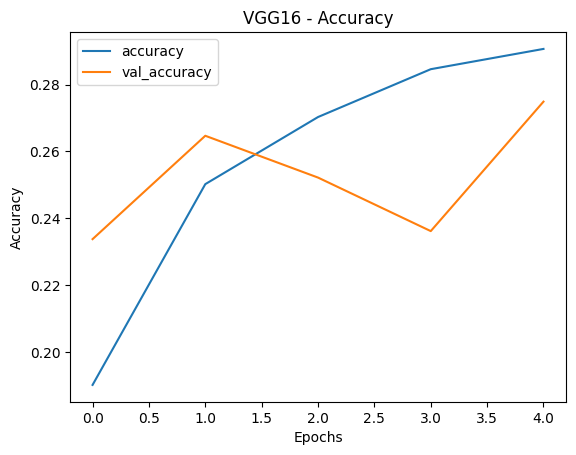

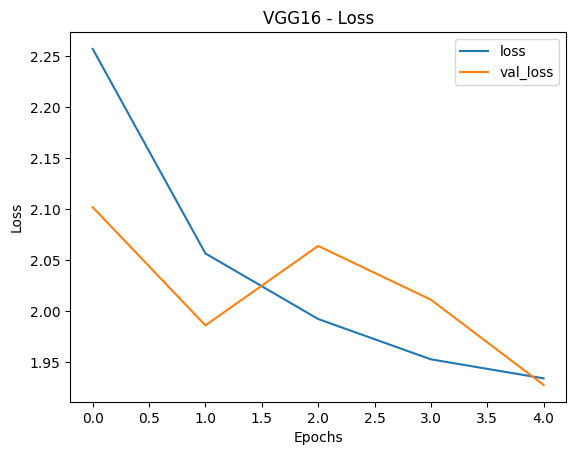

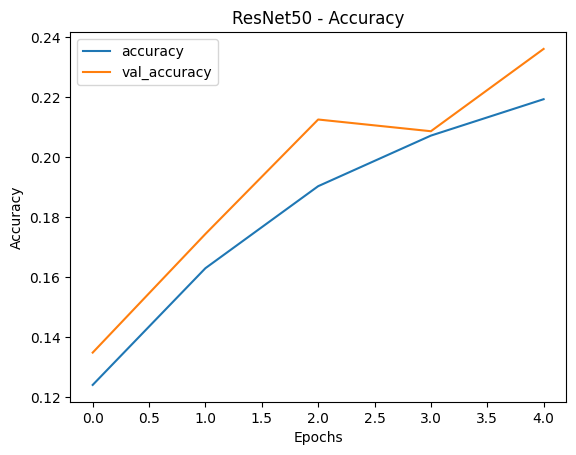

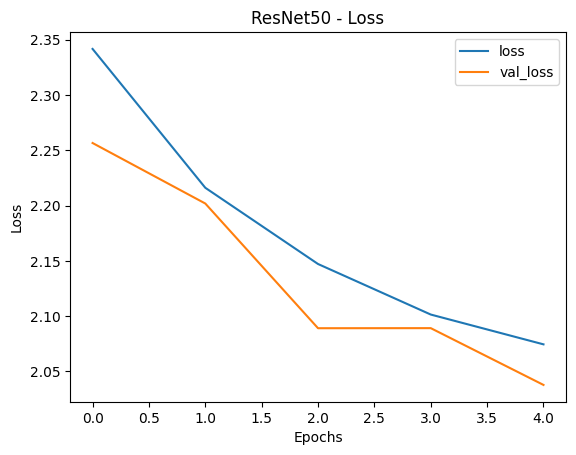

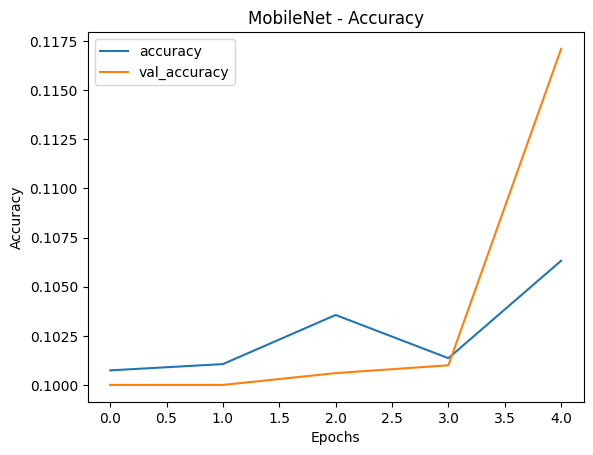

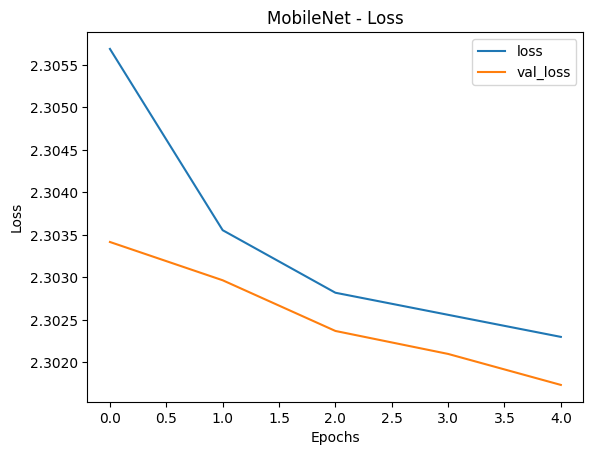

In [6]:
# visualize
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss')
    plt.legend()
    plt.show()

# Plot results
plot_history(history_vgg16, 'VGG16')
plot_history(history_resnet50, 'ResNet50')
plot_history(history_mobilenet, 'MobileNet')
